In [8]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

# Create mol object from smiles string or rdkit mol object
def draw_mol(mol):
    """Input object is mol which can be either SMILES string or RDKit mol object
    They will be visualize in IPython Display"""
    if type(mol) == type('SMILES'):
        mol = Chem.MolFromSmiles(mol)
    else:
        pass
    molSize=(450,150)
    mc = Chem.Mol(mol.ToBinary())

    if not mc.GetNumConformers():
        #Compute 2D coordinates
        rdDepictor.Compute2DCoords(mc)
        # init the drawer with the size
        drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
        #draw the molcule
        drawer.DrawMolecule(mc)
        drawer.FinishDrawing()
        # get the SVG string
        svg = drawer.GetDrawingText()
        # fix the svg string and display it
        display(SVG(svg.replace('Glucose','Glucose')))
    return

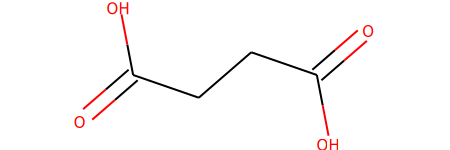

In [2]:
succinate = Chem.MolFromSmiles('C(CC(=O)O)C(=O)O')
draw_mol(succinate)

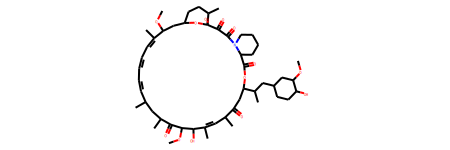

In [4]:
rapamycin = 'C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC'
draw_mol(rapamycin)

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

# create a function that make a retrosynthetic equation from two molecules
def Draw_Rxn_1to1(sm, pdt):
    """The input compounds are product (pdt) and starting material (sm) in SMILES string format"""
    if type(sm) == type('SMILES'):
        mol1 = Chem.MolFromSmiles(sm)
    else:
        mol1 = sm
    if type(pdt) == type('SMILES'):
        mol2 = Chem.MolFromSmiles(pdt)
    else:
        mol2 = pdt
    smart1 = Chem.MolToSmarts(mol1, isomericSmiles=True)
    smart2 = Chem.MolToSmarts(mol2, isomericSmiles=True)
    rxn_str = smart1 + '>>' + smart2
    rxn = AllChem.ReactionFromSmarts(rxn_str)
    return Draw.ReactionToImage(rxn)

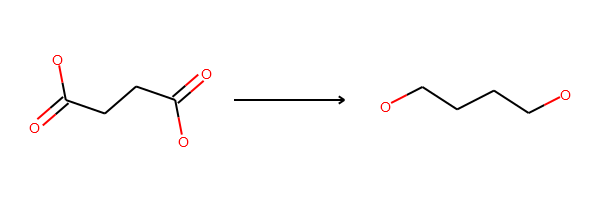

In [36]:
smi_succinate = 'C(CC(=O)O)C(=O)O'
smi_butanediol = 'C(CCO)CO'
Draw_Rxn_1to1(smi_succinate, smi_butanediol)

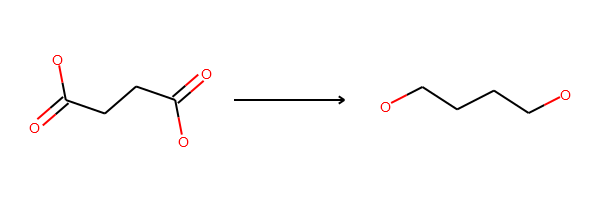

In [37]:
succinate = Chem.MolFromSmiles('C(CC(=O)O)C(=O)O')
butanediol = Chem.MolFromSmiles('C(CCO)CO')
Draw_Rxn_1to1(succinate, butanediol)

In [29]:
# To show set of molecules in grid or side-by-side
from rdkit.Chem import Draw

def Draw_Grid(mol, n_row = 0):
    """ Input a list of molecule to be written"""
    if n_row == 0:
        n_row = len(mol)
    grid = []
    for molecule in range(len(mol)):
        if type(mol[molecule]) == type('SMILES'):
            grid.append(Chem.MolFromSmiles(mol[molecule]))
        else:
            grid.append(mol[molecule])
    fig = Draw.MolsToGridImage( grid, molsPerRow=n_row)
    return fig

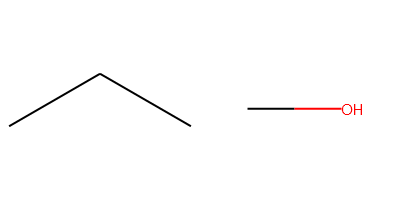

In [30]:
mol = ['CCC', 'CO']
Draw_Grid(mol)

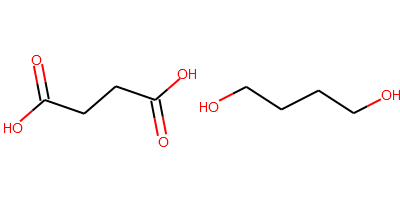

In [31]:
mol = [succinate, smi_butanediol]
Draw_Grid(mol)